# IMDb

https://bit.ly/2TXtBhc

เว็บ IMDb รวบรวมข้อมูลเกี่ยวกับภาพยนตร์ต่างๆ และตัดข้อมูลบางส่วนมาให้ใช้ทำการทดลองต่างๆ ได้ https://www.imdb.com/interfaces/

โจทย์นี้คัดกรอง [ข้อมูลบางส่วนใน IMDb](https://drive.google.com/file/d/1V5VNg1WTMTS_eEOQqylektM9ZwdG1uq2/view?usp=sharing) มา โดยโดยมีไฟล์นี้อยู่

**filteredCast.tsv**
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

**filteredTitle.tsv**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**filteredStar.tsv**
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

# โจทย์

1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ
2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)
3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน
4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action
5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท
6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน
7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย
8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


# 1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ

In [ ]:
#solution
from google.colab import files
files.upload()
files.upload()
files.upload()

Saving filteredCast-v2.tsv to filteredCast-v2.tsv


Saving filteredStar-v2.tsv to filteredStar-v2.tsv


Saving filteredTitle-v2.tsv to filteredTitle-v2.tsv


{'filteredTitle-v2.tsv': b"tconst\ttitleType\tprimaryTitle\toriginalTitle\tisAdult\tstartYear\tendYear\truntimeMinutes\tgenres\r\r\ntt0192789\tmovie\tWhile Supplies Last\tWhile Supplies Last\t0\t2002\t\\N\t120\tComedy,Musical\r\r\ntt4914592\tmovie\tElectric Heart\tElectric Heart\t0\t2017\t\\N\t75\tAdventure,Drama,Music\r\r\ntt4999994\tmovie\tRain Doll\tRain Doll\t0\t2016\t\\N\t115\tDrama\r\r\ntt2690572\tmovie\tThe Blessed Ones\tPolaris\t0\t2017\t\\N\t79\tDrama\r\r\ntt1562859\tmovie\tGolmaal 3\tGolmaal 3\t0\t2010\t\\N\t155\tAction,Comedy\r\r\ntt2380333\tmovie\tWorm\tWorm\t0\t2013\t\\N\t93\tHorror,Romance,Sci-Fi\r\r\ntt0240559\tmovie\tThe Legendary 'Tai Fei'\tGoo waak zai: Hung Hing Dai Fai Gor\t0\t1999\t\\N\t82\tCrime,Drama\r\r\ntt2431608\tmovie\tNeel Parbat Ke Paar\tNeel Parbat Ke Paar\t0\t2002\t\\N\t\\N\tDrama\r\r\ntt9680180\tmovie\tBaccha shoshur\tBaccha shoshur\t0\t2019\t\\N\t\\N\tDrama\r\r\ntt3518784\tmovie\tMagnificent\tMagnificent\t0\t2010\t\\N\t98\tComedy\r\r\ntt5629128\tmovie\t

In [ ]:
import pandas as pd
casts = pd.read_csv("filteredCast-v2.tsv", delimiter='\t')
titles = pd.read_csv('filteredTitle-v2.tsv', delimiter='\t')
stars = pd.read_csv('filteredStar-v2.tsv', delimiter='\t')

In [164]:
titles.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0192789,movie,While Supplies Last,While Supplies Last,0,2002,\N,120,"Comedy,Musical"
1,tt4914592,movie,Electric Heart,Electric Heart,0,2017,\N,75,"Adventure,Drama,Music"
2,tt4999994,movie,Rain Doll,Rain Doll,0,2016,\N,115,Drama
3,tt2690572,movie,The Blessed Ones,Polaris,0,2017,\N,79,Drama
4,tt1562859,movie,Golmaal 3,Golmaal 3,0,2010,\N,155,"Action,Comedy"


In [ ]:
titles_genres = titles['genres'].replace('\\N', None)

In [ ]:
check_genre = titles_genres.str.split(',', expand=True)

ภาพยนต์ทั้งหมดมี  24  ประเภท

โดยแบ่งได้ดังนี้
Action  :  764  เรื่อง
Adult  :  56  เรื่อง
Adventure  :  289  เรื่อง
Animation  :  139  เรื่อง
Biography  :  185  เรื่อง
Comedy  :  1773  เรื่อง
Crime  :  509  เรื่อง
Documentary  :  506  เรื่อง
Drama  :  3177  เรื่อง
Family  :  257  เรื่อง
Fantasy  :  232  เรื่อง
History  :  124  เรื่อง
Horror  :  596  เรื่อง
Music  :  133  เรื่อง
Musical  :  74  เรื่อง
Mystery  :  281  เรื่อง
News  :  7  เรื่อง
Reality-TV  :  3  เรื่อง
Romance  :  863  เรื่อง
Sci-Fi  :  186  เรื่อง
Sport  :  83  เรื่อง
Thriller  :  759  เรื่อง
War  :  88  เรื่อง
Western  :  23  เรื่อง




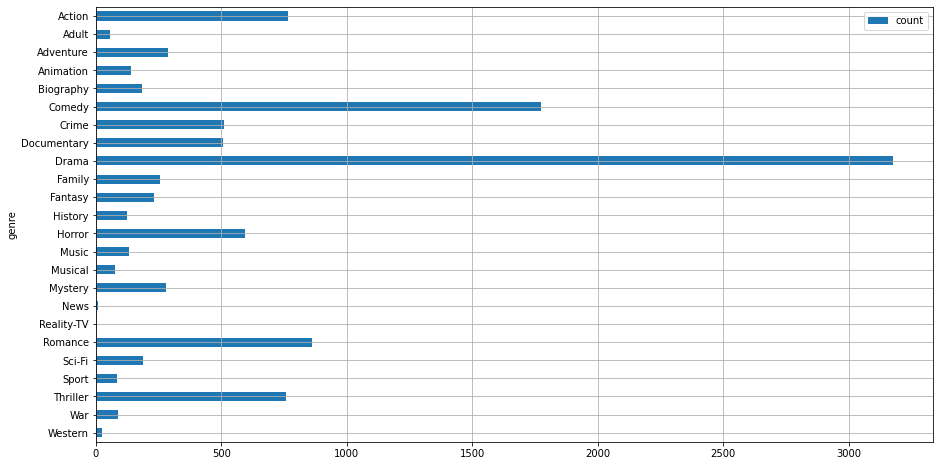

In [ ]:
from collections import Counter
count_genres = check_genre[0].append([check_genre[1], check_genre[2]])

x = pd.DataFrame.from_dict(Counter(count_genres), orient='index').reset_index()
x = x.rename(columns={'index' : 'genre', 0 : 'count'})
x = x.dropna(axis=0)

count_genres = x.groupby(x['genre']).agg('sum')

print('ภาพยนต์ทั้งหมดมี ' , len(count_genres) , ' ประเภท\n')
print('โดยแบ่งได้ดังนี้')
for row, column in count_genres.iterrows():
    print(row , ' : ' , column['count'] , ' เรื่อง')
print('\n')
count_genres.plot(kind='barh', figsize=(15, 8), legend=True, grid=True).invert_yaxis()

# 2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)

In [108]:
#solution
profession = stars['primaryProfession'].str.split(',', expand=True)
count_profession = profession[0].append([profession[1], profession[2]])
count_profession = pd.DataFrame.from_dict(Counter(count_profession), orient='index').reset_index()
count_profession.rename(columns={'index' : 'profession', 0 : 'count'}, inplace=True)

for row, column in count_profession.iterrows():
    if column['profession'] == 'actor' :
        print('นักแสดงชายมีทั้งหมด : ' , column['count'] , ' คน')
    elif column['profession'] == 'actress' :
        print('นักแสดงหญิงมีทั้งหมด : ' , column['count'] , ' คน')

นักแสดงหญิงมีทั้งหมด :  3537  คน
นักแสดงชายมีทั้งหมด :  4300  คน


# 3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน

In [ ]:
#solution
age = stars.drop(axis=1, columns=['primaryProfession', 'knownForTitles'])
age['thisYear'] = 2020
age = age.replace({'\\N' : 0})
age['deathYear'] = pd.to_numeric(age['deathYear'], downcast='integer')

for row, column in age.iterrows():
    if age.loc[row, 'deathYear'] == 0:
        age.loc[row, 'Age'] = age.loc[row, 'thisYear'] - age.loc[row, 'birthYear']
    else:
        age.loc[row, 'Age'] = 'Death'

In [114]:
count_age = Counter(age['Age'])
count_age = pd.DataFrame.from_dict(count_age, orient='index')
count_age = count_age.drop(axis=0, index=['Death']).reset_index()
count_age.rename(columns={ 'index' : 'Age', 0 : 'count'}, inplace=True)
count_age['Age'] = pd.to_numeric(count_age['Age'], downcast='integer')
count_age.sort_values(by='Age', inplace=True)

print('นักแสดงที่ยังมีชีวิตอยู่ ดังนี้\n')
for row, column in count_age.iterrows():
    print('ช่วงอายุ', column['Age'], ' ปี มีจำนวนทั้งหมด', column['count'], ' คน')

นักแสดงที่ยังมีชีวิตอยู่ ดังนี้

ช่วงอายุ 31  ปี มีจำนวนทั้งหมด 213  คน
ช่วงอายุ 32  ปี มีจำนวนทั้งหมด 233  คน
ช่วงอายุ 33  ปี มีจำนวนทั้งหมด 288  คน
ช่วงอายุ 34  ปี มีจำนวนทั้งหมด 328  คน
ช่วงอายุ 35  ปี มีจำนวนทั้งหมด 317  คน
ช่วงอายุ 36  ปี มีจำนวนทั้งหมด 365  คน
ช่วงอายุ 37  ปี มีจำนวนทั้งหมด 389  คน
ช่วงอายุ 38  ปี มีจำนวนทั้งหมด 438  คน
ช่วงอายุ 39  ปี มีจำนวนทั้งหมด 430  คน
ช่วงอายุ 40  ปี มีจำนวนทั้งหมด 448  คน
ช่วงอายุ 41  ปี มีจำนวนทั้งหมด 495  คน
ช่วงอายุ 42  ปี มีจำนวนทั้งหมด 460  คน
ช่วงอายุ 43  ปี มีจำนวนทั้งหมด 442  คน
ช่วงอายุ 44  ปี มีจำนวนทั้งหมด 463  คน
ช่วงอายุ 45  ปี มีจำนวนทั้งหมด 472  คน
ช่วงอายุ 46  ปี มีจำนวนทั้งหมด 447  คน
ช่วงอายุ 47  ปี มีจำนวนทั้งหมด 505  คน
ช่วงอายุ 48  ปี มีจำนวนทั้งหมด 511  คน
ช่วงอายุ 49  ปี มีจำนวนทั้งหมด 498  คน


# 4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action

In [97]:
#solution
action_movie = titles.drop(axis=1, columns=['isAdult', 'startYear', 'endYear', 'runtimeMinutes'])
action_movie['genre1'] = check_genre[0]
action_movie['genre2'] = check_genre[1]
action_movie['genre3'] = check_genre[2]
action_movie = action_movie.loc[(action_movie['genre1'] == 'Action') | (action_movie['genre2'] == 'Action') | (action_movie['genre3'] == 'Action')]
action_movie_list = action_movie['tconst']

In [89]:
action_cast = casts[casts['tconst'].isin(action_movie_list)]
action_cast_list = action_cast['nconst']

In [115]:
action_stars = stars[stars['nconst'].isin(action_cast_list)]

print('จำนวนภาพยนต์ Action : ', len(action_movie), ' เรื่อง')
print('จำนวนนักแสดงที่เคยแสดงในภาพยนต์ Action : ', len(action_stars), ' คน')

จำนวนภาพยนต์ Action :  764  เรื่อง
จำนวนนักแสดงที่เคยแสดงในภาพยนต์ Action :  1137  คน


# 5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท

In [112]:
#solution
stars.sample(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
3952,nm1384721,Özcan Deniz,1972,\N,"actor,writer,director","tt6213036,tt3142958,tt6462806,tt0424649"
2342,nm0772704,Kyle Schmid,1984,\N,"actor,producer,writer","tt5541338,tt0399146,tt1595680,tt2006374"
3358,nm1167656,T.R. Silambarasan,1983,\N,"actor,music_department,soundtrack","tt3426270,tt0464106,tt1609168,tt0460976"
4572,nm1661403,Eddie Diaz,1981,\N,actor,"tt1166988,tt1594921,tt0939839,tt1201151"
6513,nm2986126,Yuri Morishita,1985,\N,"actress,producer","tt1483620,tt1573847,tt4263824,tt1220668"


In [111]:
titles.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4677,tt5039822,movie,Addicted to Sexting,Addicted to Sexting,0,2015,\N,80,Documentary
4743,tt6789368,movie,"Riso, amore e fantasia","Riso, amore e fantasia",0,2016,\N,\N,Comedy
277,tt2146882,movie,Badha,Badha,0,2005,\N,136,"Action,Drama,Romance"
553,tt4272826,movie,Cool Apocalypse,Cool Apocalypse,0,2015,\N,73,"Comedy,Drama,Romance"
140,tt1294135,movie,Ankith Pallavi and Friends,Ankith Pallavi and Friends,0,2008,\N,130,Drama


In [ ]:
casts.sample(5)

,tconst,ordering,nconst,category,job,characters
6577,tt2400473,1,nm1594672,actor,\N,"[""Barry Montenegro""]"
7515,tt3503454,7,nm5183723,producer,producer,\N
8340,tt4571838,1,nm0708045,actress,\N,"[""Anita""]"
7892,tt3862762,2,nm0003082,actor,\N,"[""Charlie Sundstrom""]"
4406,tt1422713,3,nm1162227,actor,\N,"[""Manuel B.""]"


In [121]:
casts[casts['nconst'] == 'nm1594672']

,tconst,ordering,nconst,category,job,characters
6577,tt2400473,1,nm1594672,actor,\N,"[""Barry Montenegro""]"
10239,tt8375936,9,nm1594672,actor,\N,"[""Officer Krueger""]"


#6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน


In [141]:
#solution
leap_year = titles.drop(axis=1, columns=['isAdult', 'endYear', 'runtimeMinutes', 'genres'])

for row, column in leap_year.iterrows() :
    if (leap_year.loc[row, 'startYear'] % 4 == 0 & ((leap_year.loc[row, 'startYear'] % 100 != 0) | (leap_year.loc[row, 'startYear'] % 400 == 0))):
        leap_year.loc[row, 'isLeapYear'] = 1
    else :
        leap_year.loc[row, 'isLeapYear'] = 0

In [152]:
print('จำนวนภาพยนต์ที่เข้าฉายในปีอธิกสุรทิน', Counter(leap_year['isLeapYear'])[1], ' เรื่อง')

จำนวนภาพยนต์ที่เข้าฉายในปีอธิกสุรทิน 1504  เรื่อง


#7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย

In [163]:
#solution
director = stars.drop(axis=1, columns=['birthYear', 'deathYear', 'knownForTitles'])
director['role1'] = profession[0]
director['role2'] = profession[1]
director['role3'] = profession[2]
director_list = director.loc[(director['role1'] == 'director') | (director['role2'] == 'director') | (director['role3'] == 'director')]

In [167]:
print('จำนวนผู้กำกับที่เป็นนักแสดง ', len(director_list), 'คน')

จำนวนผู้กำกับที่เป็นนักแสดง  1284 คน


#8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


In [ ]:
#solution